## Seasonal component in trends in CBOT SRW nearest futures price

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [78]:
data_orig = pd.read_excel('SRW/SRW.xlsx')                 # import data
data_orig['Date'] = pd.to_datetime(data_orig['Date'])     # convert date column to DateTime

# Conver ¢/bush to USD/tonn
def c_bu_to_usd_t(price):
    return price * 0.367437

for p in ['Price', 'Open', 'High', 'Low']:
    data_orig[p] = data_orig[p].apply(c_bu_to_usd_t)

data_orig['Ave_SRW'] = (data_orig['Open'] + data_orig['High'] + data_orig['Low'] + data_orig['Price'])/4

data_orig = data_orig.drop(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)
    
data_orig.head(3)

,Date,Ave_SRW
0,2022-08-01,291.607189
1,2022-07-01,305.500901
2,2022-06-01,361.741726


In [79]:
xcoords = []                                                   # set dates for separating years
for i in range(2000, 2023):
    xcoords.append(f'{i}-07-01')

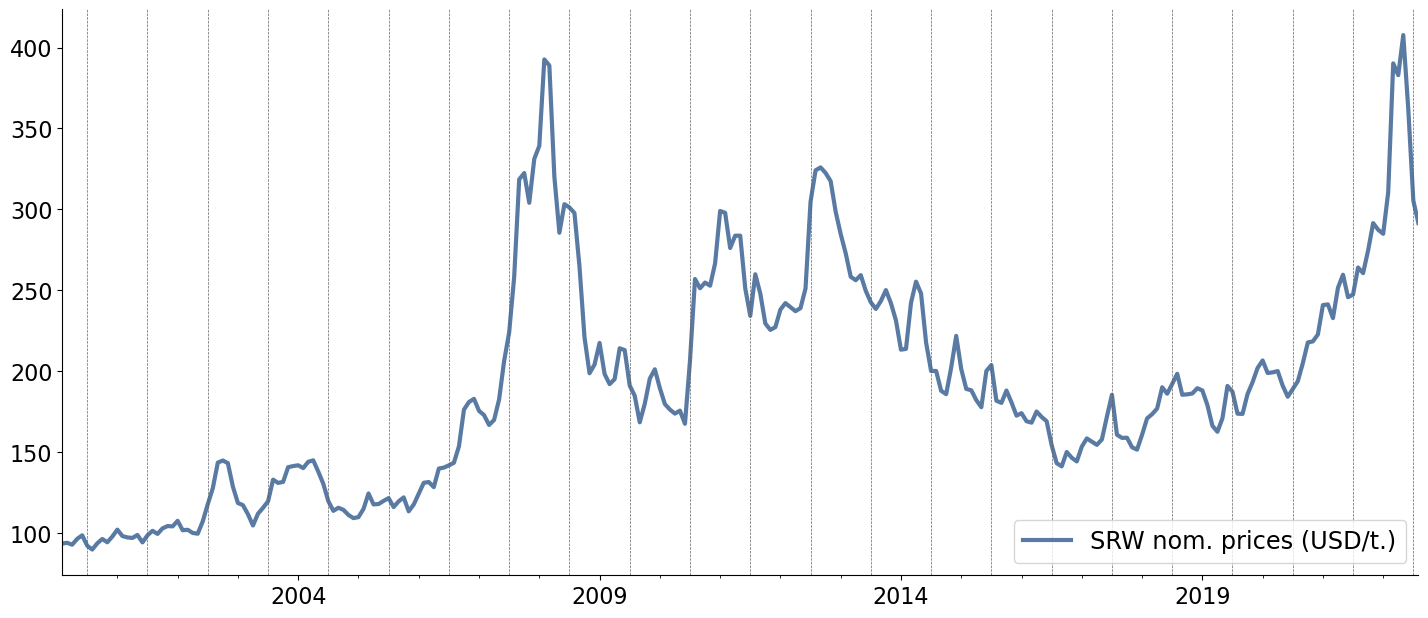

In [80]:
ax = data_orig.plot(x='Date', y='Ave_SRW',                     # ploting chart
                    figsize=(17.5,7.35),
                    color=(0.35, 0.48, 0.64),
                    label = 'SRW nom. prices (USD/t.)',
                    linewidth=3
                   )
for xc in xcoords:
    plt.axvline(x=xc, 
                color=(0.38, 0.38, 0.38), 
                linestyle='--',
                linewidth=0.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(fontsize='xx-large', frameon=True)
ax.set_xlabel('')

plt.show()

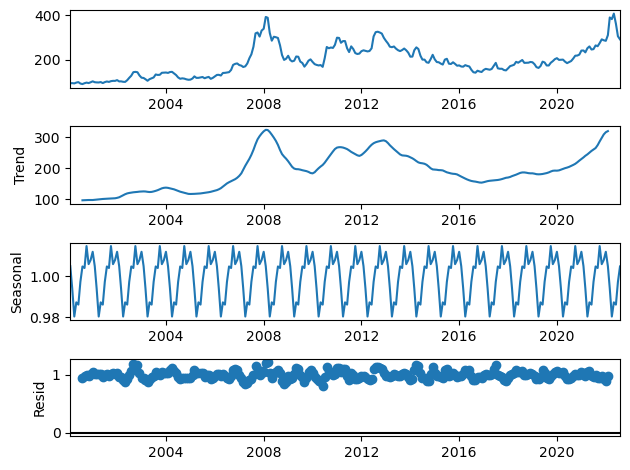

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_orig.set_index('Date', inplace=True)

analysis = data_orig[['Ave_SRW']][::-1].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

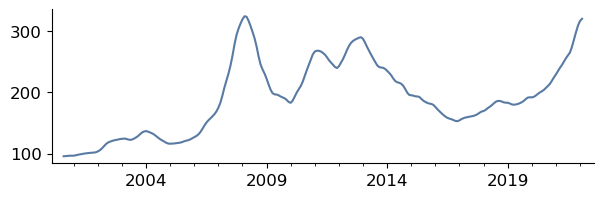

In [56]:
ax = trend.plot(figsize=(7,2),
              color=(0.35, 0.48, 0.64),
              linewidth=1.5
              )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('')

plt.show()

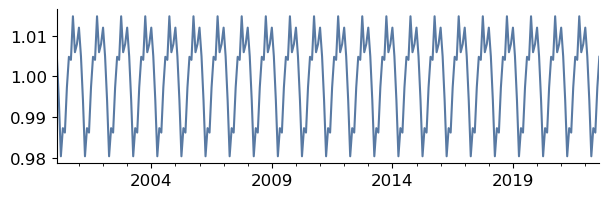

In [57]:
ax = seasonal.plot(figsize=(7,2),
              color=(0.35, 0.48, 0.64),
              linewidth=1.5
              )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('')

plt.show()

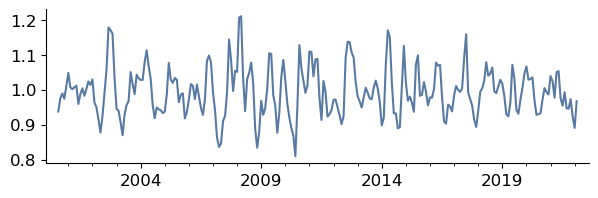

In [58]:
ax = residual.plot(figsize=(7,2),
              color=(0.35, 0.48, 0.64),
              linewidth=1.5
              )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('')

plt.show()

In [81]:
xcoords2 = ['2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01' , '2002-06-01', '2002-07-01' ]

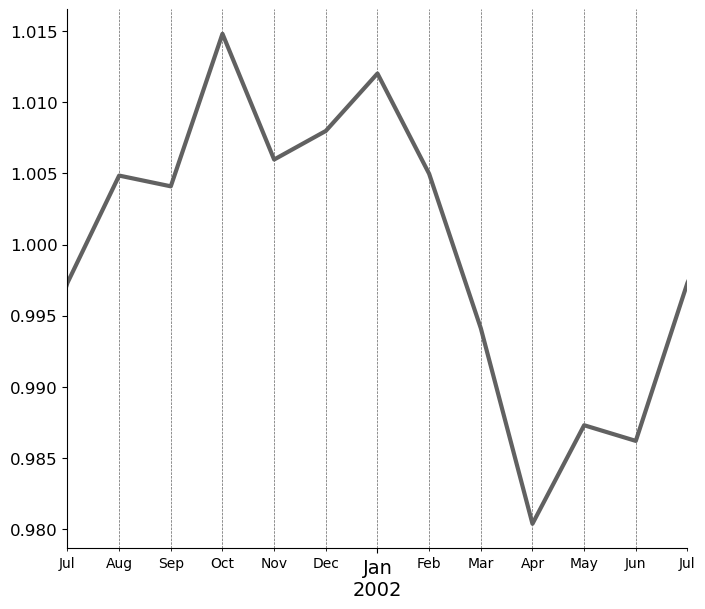

In [82]:
ax = seasonal.plot(figsize=(8,7),                                  # ploting chart for one season
              xlim=('2001-07-01', '2002-07-01'),
              color=(0.38, 0.38, 0.38),
              label = 'SRW infl. abj. prices (USD/t.)',
              linewidth=3,
             )

for xc in xcoords2:
    plt.axvline(x=xc, 
                color=(0.38, 0.38, 0.38), 
                linestyle='--',
                linewidth=0.5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.set_xlabel('')

plt.show()